 <a name="topo"></a>

# Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)  
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)             

 <a name="titanic"></a>

# O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
<br>

[início](#topo)

 <a name="aed"></a>

## Análise Exploratória de Dados (AED)
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.

<br>

[início](#topo)

### Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Ler train e test

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.set_index('PassengerId', inplace=True)

In [5]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [8]:
train.shape, test.shape

((891, 11), (418, 10))

In [9]:
data = pd.concat([train, test], sort=True)

### Traduzir Colunas

In [10]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [11]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Bilhete']

In [12]:
data.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


 <a name="mapsex"></a>

### Mapear Sexo para "homem" e "mulher"

In [13]:
sexo = {'male': 'homem', 'female': 'mulher'}

In [14]:
data['Sexo'] = data['Sexo'].replace(sexo)

 <a name="portembarque"></a>

 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Idade            1046 non-null float64
Cabine           295 non-null object
Embarque         1307 non-null object
Tarifa           1308 non-null float64
Nome             1309 non-null object
PaisFilhos       1309 non-null int64
Classe           1309 non-null int64
Sexo             1309 non-null object
IrmaosConjuge    1309 non-null int64
Sobreviveu       891 non-null float64
Bilhete          1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [ ]:
# Sexo, Embarque, Sobreviveu

 <a name="ord"></a>

* ### Ordinais

In [ ]:
# Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [ ]:
# Idade, Tarifa

 <a name="disc"></a>

* ### Discretos

In [ ]:
# PaisFilhos, IrmaosConjuge

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [ ]:
# Bilhete

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [16]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [17]:
moda_embarque = data['Embarque'].mode()[0]
moda_embarque

'S'

In [18]:
data['Embarque'].fillna(moda_embarque, inplace=True)

### Informações Gerais (Parâmetros Numéricos)

In [19]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [21]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",homem,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

<br>

[início](#topo)

### Tamanho da Amostra

In [22]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [23]:
len(data)/2224

0.5885791366906474

### Proporção de Sobreviventes (População)

In [24]:
1502/2224

0.6753597122302158

### Proporção de Sobreviventes (Amostra)

In [25]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
342/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [34]:
data[['Classe', 'Sobreviveu']].groupby(['Classe']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [35]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [36]:
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [37]:
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [38]:
data[['IrmaosConjuge', 'PaisFilhos']].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

Text(0,0.5,'')

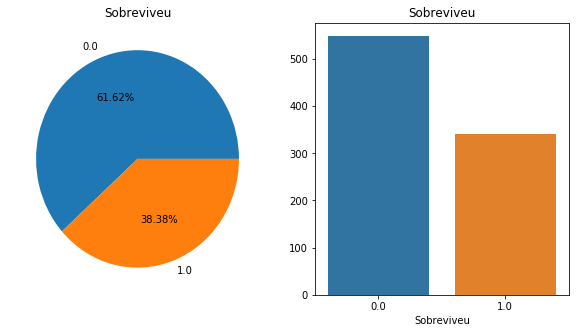

In [39]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

data['Sobreviveu'].value_counts().plot.pie(autopct='%0.2f%%', ax=ax[0])

ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')

sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

## Sobrevivência Por Sexo

In [42]:
data.groupby(['Sexo', 'Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [43]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

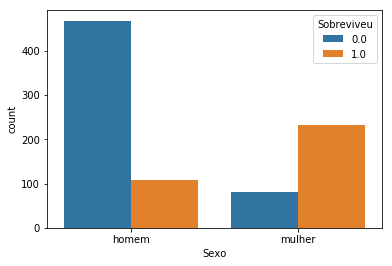

In [44]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

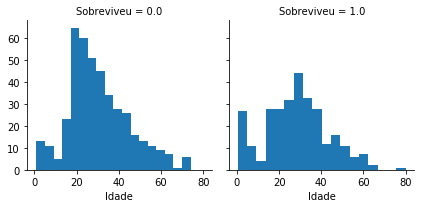

In [45]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Agrupar mulheres por sobrevivência

In [46]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [47]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

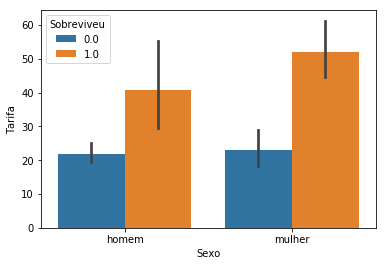

In [48]:
sns.barplot('Sexo', 'Tarifa', hue='Sobreviveu', data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

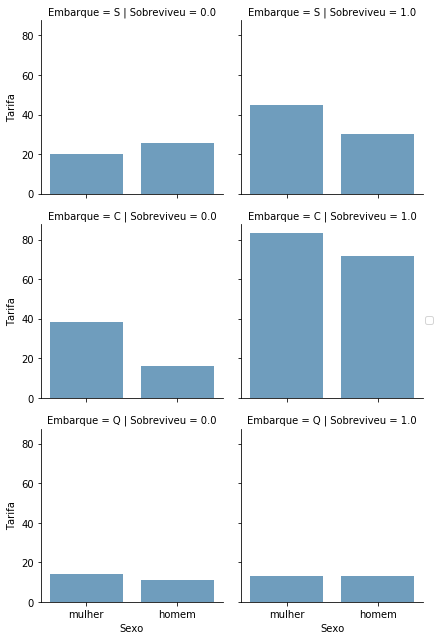

In [49]:
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
grid.add_legend()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [50]:
pd.crosstab(index=data['Sobreviveu'], columns=data['Classe'],margins=True)

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

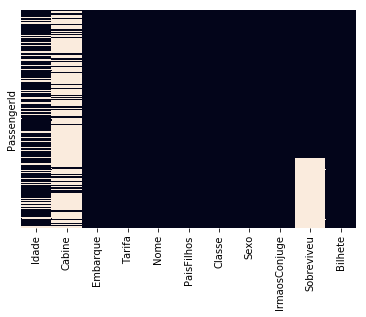

In [51]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

### Remover Cabine

In [52]:
data.drop(['Cabine'], axis=1, inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

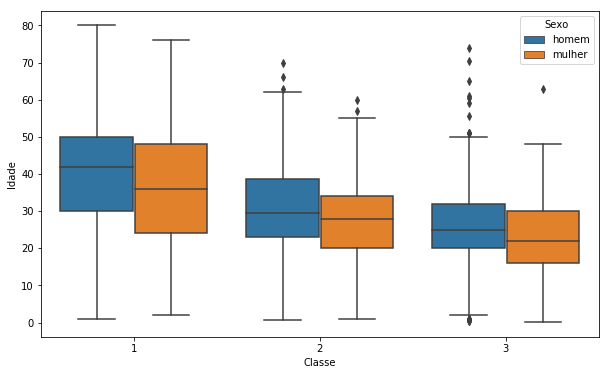

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [54]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [55]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [56]:
pd.crosstab(index=data['Titulo'], columns=data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [57]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x)

In [58]:
pd.crosstab(index=data['Titulo'], columns=data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [59]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [60]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [70]:
data['Nome'].str.split(',').str[0]

PassengerId
1                 Braund
2                Cumings
3              Heikkinen
4               Futrelle
5                  Allen
6                  Moran
7               McCarthy
8                Palsson
9                Johnson
10                Nasser
11             Sandstrom
12               Bonnell
13           Saundercock
14             Andersson
15               Vestrom
16               Hewlett
17                  Rice
18              Williams
19         Vander Planke
20            Masselmani
21                Fynney
22               Beesley
23               McGowan
24                Sloper
25               Palsson
26               Asplund
27                  Emir
28               Fortune
29               O'Dwyer
30              Todoroff
              ...       
1280             Canavan
1281             Palsson
1282               Payne
1283               Lines
1284              Abbott
1285             Gilbert
1286       Kink-Heilmann
1287               Smith
1288         

### Criar Feature Sobrenome da Família

In [71]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [69]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False).head()

Sobrenome
Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
Name: Nome, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [73]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']]\
.loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


### Mulheres e Crianças da Família "Sage"

In [74]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']]\
.loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


### Mulheres e Crianças da Família "Brown"

In [75]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']]\
.loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


### Criar DataFrame "MulherOuCrianca"

In [76]:
MulherOuCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

In [78]:
MulherOuCrianca.head()

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete,Titulo,Sobrenome
PassengerId,,,,,,,,,,,,
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599,Casada,Cumings
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282,Solteira,Heikkinen
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803,Casada,Futrelle
8,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,homem,3,0.0,349909,Menino,Palsson
9,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,mulher,0,1.0,347742,Casada,Johnson


In [79]:
MulherOuCrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [80]:
MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [81]:
data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

PassengerId
1       0
2       1
3       1
4       1
5       1
6       1
7       0
8       4
9       3
10      1
11      2
12      1
13      0
14      7
15      1
16      1
17      5
18      0
19      2
20      1
21      0
22      0
23      1
24      0
25      4
26      4
27      0
28      2
29      1
30      0
       ..
1280    1
1281    4
1282    0
1283    1
1284    1
1285    0
1286    1
1287    1
1288    0
1289    0
1290    0
1291    0
1292    1
1293    0
1294    0
1295    0
1296    1
1297    0
1298    0
1299    0
1300    0
1301    0
1302    0
1303    1
1304    0
1305    0
1306    0
1307    0
1308    0
1309    2
Name: Sobrenome, Length: 1309, dtype: int64

In [82]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

In [83]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
            data['TamanhoGrupo'].at[idx] = 0

### Criar Recurso "SobrevivenciaGrupo"

In [84]:
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()

Sobreviveu    0.142857
dtype: float64

In [89]:
data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']==x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

PassengerId
1            NaN
2       1.000000
3       1.000000
4       1.000000
5       1.000000
6       1.000000
7            NaN
8       0.000000
9       1.000000
10      1.000000
11      1.000000
12      1.000000
13           NaN
14      0.142857
15      0.000000
16      1.000000
17      0.000000
18           NaN
19      0.000000
20      1.000000
21           NaN
22           NaN
23      1.000000
24           NaN
25      0.000000
26      0.750000
27           NaN
28      1.000000
29      1.000000
30           NaN
          ...   
1280    0.000000
1281    0.000000
1282         NaN
1283    1.000000
1284    1.000000
1285         NaN
1286    1.000000
1287    1.000000
1288         NaN
1289         NaN
1290         NaN
1291         NaN
1292    1.000000
1293         NaN
1294         NaN
1295         NaN
1296    1.000000
1297         NaN
1298         NaN
1299         NaN
1300         NaN
1301         NaN
1302         NaN
1303    1.000000
1304         NaN
1305         NaN
1306         NaN
13

In [90]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']==x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [91]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['SobrevivenciaGrupo'].at[idx] = 0

In [92]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.00,HomemAdulto
2,1.00,Casada
3,1.00,Solteira
4,1.00,Casada
5,0.00,HomemAdulto
6,0.00,HomemAdulto
7,0.00,HomemAdulto
8,0.00,Menino
9,1.00,Casada


In [95]:
data['SobrevivenciaGrupo'].isnull().sum()

119

In [96]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [97]:
data['SobrevivenciaGrupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [99]:
data[['Sobrenome', 'Titulo']]\
.loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [105]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']]\
.loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [101]:
data[['Sobrenome', 'Titulo']]\
.loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [106]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']]\
.loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [103]:
data[['Sobrenome', 'Titulo']]\
.loc[((data['SobrevivenciaGrupo']>0) & (data['SobrevivenciaGrupo']<1)) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [107]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']]\
.loc[((data['SobrevivenciaGrupo']>0) & (data['SobrevivenciaGrupo']<1)) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

### Poderíamos linkar com o Bilhete
Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.

<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

# Variáveis Dummy

<br>

[início](#topo)

# Usar Predição da Idade

<br>

[início](#topo)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

<a name="faixaetaria"></a>

# Criar Faixa Etária

<br>

[início](#topo)

 <a name="dummyfe"></a>

### Dummy Faixa Etaria

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar

<br>

[início](#topo)

## Atualizar train e test 

## Utilizar train para treinar o modelo

### Escolher colunas

### Averiguando Shapes 

### Importar train_test_split para dividir e preparar para treino

### Dividir 70% para treinar, 30% para testar

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [211]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [213]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [214]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

<a name="ranking"></a>

# Ranking de Modelos Por Score

<br>

[início](#topo)

<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [226]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

### Revocação

### Acuracidade

### Precisão

### F1-Score

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

## Selecionando Threshold (Limite)

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [311]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [319]:
from sklearn.ensemble import BaggingClassifier

* #### Ensacamento DecisionTree


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

* ### Configurando Hyper-Parâmetros para o AdaBoost

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)